In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

In [2]:
all_patent_year = pd.read_csv('/dfs/scratch0/hanchcao/Transfer_CS/transfer_cs/data/patent_year.txt',sep='\t',names=['patent_id','patent_year'])
all_patent_year = all_patent_year.astype({'patent_id': 'str'})
all_patent_year['patent_year'] = pd.to_numeric(all_patent_year['patent_year'], errors='coerce')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
venue_classification = pd.read_csv('/dfs/scratch0/hanchcao/Transfer_CS/transfer_cs/transfer_ai/processed_data/paperyear_extracted/venueID_category.csv',sep=',',names=['venue_id','conference','subfield'])

In [4]:
paper_year = pd.read_csv('/dfs/scratch0/hanchcao/Transfer_CS/transfer_cs/transfer_ai/processed_data/paperyear_extracted/paperyear_result.tsv',sep=',',usecols=['paperid','year'])
paper_year.columns = ['paper_id','paper_year']
paper_year['paper_year'] = pd.to_numeric(paper_year['paper_year'], errors='coerce')


In [5]:
paper_venue = pd.read_csv('/dfs/scratch0/hanchcao/Transfer_CS/transfer_cs/transfer_ai/processed_data/paperids_extracted/paperids.tsv',sep='\t',names=['paper_id','venue_id'])
paper_venue = paper_venue.astype({'paper_id': 'str'})

In [7]:
paper_patent_linkage = pd.read_csv('/dfs/scratch0/hanchcao/Transfer_CS/transfer_cs/transfer_ai/processed_data/patentcitation2science_extracted/patentcitationscience_result.tsv',sep='\t',names=['patent_id','text','paper_id','app','score'])
paper_patent_linkage = paper_patent_linkage.astype({'paper_id': 'str'})

In [8]:
paper_patent_linkage_year = paper_patent_linkage.merge(all_patent_year, how = 'inner', on = 'patent_id').merge(paper_year, how = 'inner', on = 'paper_id').merge(paper_venue, how = 'inner', on = 'paper_id').merge(venue_classification, how = 'inner', on = 'venue_id')

In [9]:
paper_patent_linkage_year['patent_paper_lag'] = paper_patent_linkage_year['patent_year'] - paper_patent_linkage_year['paper_year']

In [11]:
paper_patent_linkage_year = paper_patent_linkage_year.dropna()
paper_patent_linkage_year = paper_patent_linkage_year.astype({'paper_year': 'int'})

In [ ]:
## Plot number of patents per year per field 
patent_AI = pd.DataFrame({'count':data_AI.groupby('year')['patent_id'].value_counts()}).reset_index()
patent_AI = pd.DataFrame({'count': patent_AI.groupby('year')['patent_id'].count()}).reset_index()
patent_CV = pd.DataFrame({'count':data_CV.groupby('year')['patent_id'].value_counts()}).reset_index()
patent_CV = pd.DataFrame({'count': patent_CV.groupby('year')['patent_id'].count()}).reset_index()
patent_ML = pd.DataFrame({'count':data_ML.groupby('year')['patent_id'].value_counts()}).reset_index()
patent_ML = pd.DataFrame({'count': patent_ML.groupby('year')['patent_id'].count()}).reset_index()
patent_NLP = pd.DataFrame({'count':data_NLP.groupby('year')['patent_id'].value_counts()}).reset_index()
patent_NLP = pd.DataFrame({'count': patent_NLP.groupby('year')['patent_id'].count()}).reset_index()
patent_web = pd.DataFrame({'count':data_web.groupby('year')['patent_id'].value_counts()}).reset_index()
patent_web = pd.DataFrame({'count': patent_web.groupby('year')['patent_id'].count()}).reset_index()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xlim([1960,2020])
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Number of patents', fontsize = 18)
plt.title('Number of patents by year', fontsize = 18)
plt.plot(patent_AI['year'], patent_AI['count'], 'o-', label = 'AI', color = 'black', linewidth = 2)
plt.plot(patent_CV['year'], patent_CV['count'], 'o-', label = 'CV', color = 'red', linewidth = 2)
plt.plot(patent_ML['year'], patent_ML['count'], 'o-', label = 'ML', color = 'green', linewidth = 2)
plt.plot(patent_NLP['year'], patent_NLP['count'], 'o-', label = 'NLP', color = 'blue', linewidth = 2)
plt.plot(patent_web['year'], patent_web['count'], 'o-', label = 'WEB', color = 'cyan', linewidth = 2)
plt.legend(loc = 'upper left')
plt.rc('font', **font)
plt.show()

In [12]:
paper_patent_linkage_year

,patent_id,text,paper_id,app,score,patent_year,paper_year,venue_id,conference,subfield,patent_paper_lag
0,10000124,exponential family sparse coding with applicat...,1490256991,app,10,2018,2009,1203999783,IJCAI,AI,9.0
1,10048683,exponential family sparse coding with applicat...,1490256991,app,10,2018,2009,1203999783,IJCAI,AI,9.0
2,8977579,`exponential family sparse coding with applica...,1490256991,exm,10,2015,2009,1203999783,IJCAI,AI,6.0
3,9466362,"lee, honglak, et al., """"exponential family spa...",1490256991,app,10,2016,2009,1203999783,IJCAI,AI,7.0
4,9494940,exponential family sparse coding with applicat...,1490256991,app,10,2016,2009,1203999783,IJCAI,AI,7.0
5,9507346,exponential family sparse coding with applicat...,1490256991,app,10,2016,2009,1203999783,IJCAI,AI,7.0
6,9517767,exponential family sparse coding with applicat...,1490256991,app,10,2016,2009,1203999783,IJCAI,AI,7.0
7,9606539,exponential family sparse coding with applicat...,1490256991,app,10,2017,2009,1203999783,IJCAI,AI,8.0
8,9612123,exponential family sparse coding with applicat...,1490256991,app,10,2017,2009,1203999783,IJCAI,AI,8.0
9,9630619,exponential family sparse coding with applicat...,1490256991,app,10,2017,2009,1203999783,IJCAI,AI,8.0


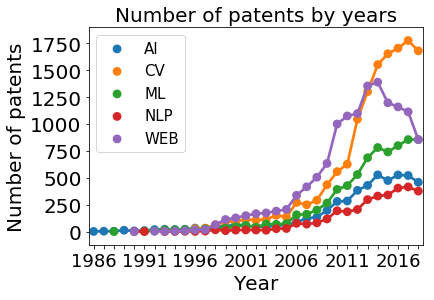

In [27]:
# related patents over year
df_temp = paper_patent_linkage_year.groupby(['subfield','patent_id','patent_year']).agg('count').reset_index()
df_temp = df_temp[['subfield','patent_id','patent_year']]
df_temp = df_temp.groupby(['subfield','patent_year']).agg('count').reset_index()


df_temp = df_temp[df_temp['patent_year']>1985]
plt_ = sns.pointplot(x="patent_year", y="patent_id", hue="subfield", data=df_temp)
plt.ylabel('Number of patents',fontsize = 20)
plt.title('Number of patents by years',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.legend(fontsize =15)
plt.xlabel('Year', fontsize =20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

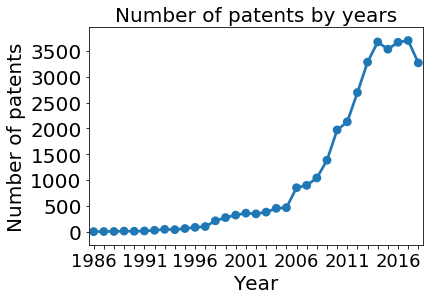

In [30]:
# related patents over year
df_temp = paper_patent_linkage_year.groupby(['patent_id','patent_year']).agg('count').reset_index()
df_temp = df_temp[['patent_id','patent_year']]
df_temp = df_temp.groupby(['patent_year']).agg('count').reset_index()


df_temp = df_temp[df_temp['patent_year']>1985]
plt_ = sns.pointplot(x="patent_year", y="patent_id", data=df_temp)
plt.ylabel('Number of patents',fontsize = 20)
plt.title('Number of patents by years',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
#plt.legend(fontsize =15)
plt.xlabel('Year', fontsize =20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [19]:
subfield_list = ['AI', 'CV', 'ML', 'NLP', 'WEB']
transfer_year = []
for subfield in subfield_list:
    df_temp = paper_patent_linkage_year[paper_patent_linkage_year['subfield']==subfield]
    print 'mean papaer to patent transfer time'
    print np.mean(list(df_temp['patent_paper_lag']))
    transfer_year.append(np.mean(list(df_temp['patent_paper_lag'])))

mean papaer to patent transfer time
16.704789480033778
mean papaer to patent transfer time
9.991710076737803
mean papaer to patent transfer time
10.360779573953769
mean papaer to patent transfer time
12.261449967440852
mean papaer to patent transfer time
11.46556733090552


Text(0.5,0,'')

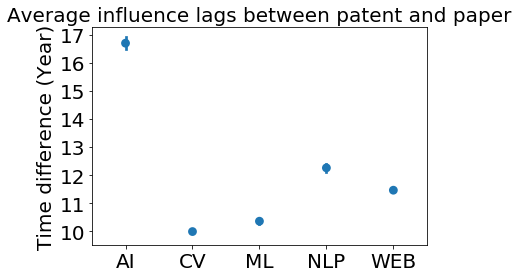

In [32]:
# the average lag of science that influence patent
sns.pointplot(x="subfield", y="patent_paper_lag", data=paper_patent_linkage_year, order = ['AI','CV','ML','NLP','WEB'], join=False)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('Average influence lags between patent and paper',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('')

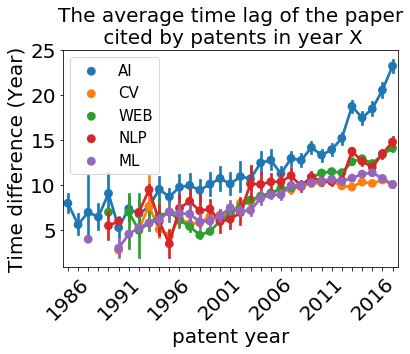

In [61]:
# the average lag of science that influence patent
df_temp = paper_patent_linkage_year[paper_patent_linkage_year['patent_year']>1985]
plt_ = sns.pointplot(x="patent_year", y="patent_paper_lag", hue="subfield", data=df_temp)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('The average time lag of the paper\n cited by patents in year X',fontsize = 20)
plt.xticks(rotation=45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize =15)
plt.xlabel('patent year', fontsize =20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


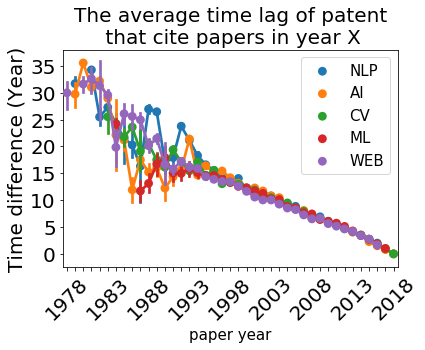

In [62]:
# the average lag of science that influence patent
df_temp = paper_patent_linkage_year.sort_values('paper_year', ascending = False).reset_index(drop=True)
df_temp = df_temp[df_temp['paper_year']>1977]
plt_ = sns.pointplot(x="paper_year", y="patent_paper_lag", hue="subfield", data=df_temp)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('The average time lag of patent\n that cite papers in year X',fontsize = 20)
plt.xticks(rotation=90)
plt.xticks(rotation=45, fontsize = 20)
plt.legend(fontsize =15)
plt.xlabel('paper year', fontsize =15)
plt.yticks(fontsize = 20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)


In [ ]:
# the average lag of science that influence patent
sns.pointplot(x="subfield", y="patent_paper_lag", data=paper_patent_linkage_year, join=False)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('Average influence lags between patent and paper',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('')

Text(0.5,0,'')

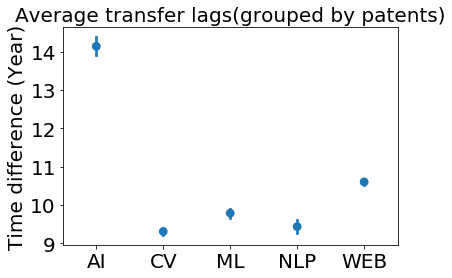

In [33]:
# the time lag of newest paper in a patent
df_temp = paper_patent_linkage_year.groupby(['patent_id','patent_year','subfield'])['patent_paper_lag'].agg('min').reset_index()
sns.pointplot(x="subfield", y="patent_paper_lag", data=df_temp, order = ['AI','CV','ML','NLP','WEB'], join=False)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('Average transfer lags (grouped by patents)',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('')

Text(0.5,0,'')

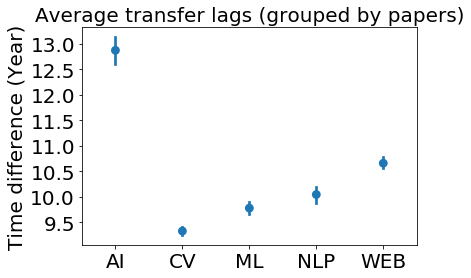

In [59]:
# the time lag of paper to newest patent
df_temp = paper_patent_linkage_year.groupby(['paper_id','patent_year','subfield'])['patent_paper_lag'].agg('min').reset_index()
sns.pointplot(x="subfield", y="patent_paper_lag", data=df_temp, order = ['AI','CV','ML','NLP','WEB'], join=False)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('Average transfer lags (grouped by papers)',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('')

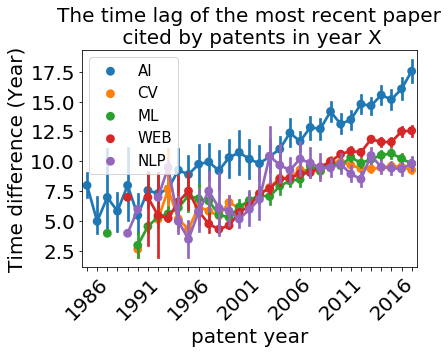

In [58]:
# the time lag of newest paper in a patent
df_temp = paper_patent_linkage_year.groupby(['patent_id','patent_year','subfield'])['patent_paper_lag'].agg('min').reset_index()
df_temp = df_temp[df_temp['patent_year']>1985]
plt_ = sns.pointplot(x="patent_year", y="patent_paper_lag", hue="subfield", data=df_temp)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('The time lag of the most recent paper\n cited by patents in year X',fontsize = 20)
plt.xticks(rotation=45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize =15)
plt.xlabel('patent year', fontsize =20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

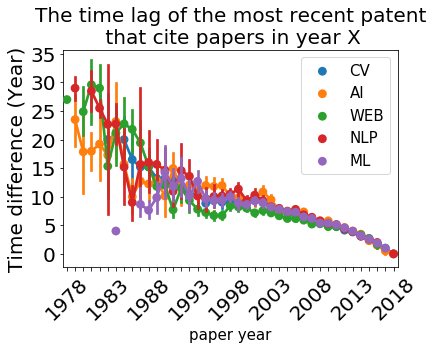

In [57]:

# the first patent that adopts a paper
df_temp = paper_patent_linkage_year.groupby(['paper_id','paper_year',"subfield"])['patent_paper_lag'].agg('min').reset_index()
df_temp = df_temp[df_temp['paper_year']>1977]
plt_ = sns.pointplot(x="paper_year", y="patent_paper_lag", hue="subfield", data=df_temp)
plt.ylabel('Time difference (Year)',fontsize = 20)
plt.title('The time lag of the most recent patent\n that cite papers in year X',fontsize = 20)
plt.xticks(rotation=45, fontsize = 20)
plt.legend(fontsize =15)
plt.xlabel('paper year', fontsize =15)
plt.yticks(fontsize = 20)
for ind, label in enumerate(plt_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [ ]:
average/mean transfer time for patent/paper